In [2]:
# Initial imports
import os
import json
import requests
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api = os.getenv("ALPACA_API")
alpaca_secret = os.getenv("ALPACA_SECRET")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api,
    alpaca_secret,
    api_version = "v2"
)

In [5]:
# Format current date as ISO format
start_date = pd.Timestamp("2018-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG", "SHOP", "PLD", "TTWO", "ATVI", "NVDA", "AMD",
          "PEP", "MKC", "DPZ", "WING", "COST", "ETSY", "CPB", "OKTA", "ZM"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get price data for 20 picks 
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Drop any rows with NaN
ticker_data.dropna(inplace=True)
ticker_data.isna().sum()


# Preview DataFrame
ticker_data.head(20)

AAPL                                       \
                              open      high      low   close    volume   
time                                                                      
2019-04-18 00:00:00-04:00  203.120  204.1500  202.520  203.86  21928367   
2019-04-22 00:00:00-04:00  202.830  204.9400  202.340  204.64  13720923   
2019-04-23 00:00:00-04:00  204.430  207.7500  203.900  207.51  19401417   
2019-04-24 00:00:00-04:00  207.360  208.4800  207.050  207.18  14914939   
2019-04-25 00:00:00-04:00  206.830  207.7600  205.120  205.24  15908807   
2019-04-26 00:00:00-04:00  204.900  205.0000  202.120  204.29  16315669   
2019-04-29 00:00:00-04:00  204.400  205.9700  203.860  204.61  19641066   
2019-04-30 00:00:00-04:00  203.060  203.4000  199.110  200.57  35362106   
2019-05-01 00:00:00-04:00  209.880  215.3100  209.230  210.52  57751414   
2019-05-02 00:00:00-04:00  209.840  212.6500  208.130  209.17  29014844   
2019-05-03 00:00:00-04:00  210.740  211.8400  210.230  211.78  17987793   
2019-05-06 00:00:00-04:00  204.290  208.8400  203.500  208.60  28949691   
2019-05-07 00:00:00-04:00  205.880  207.4175  200.825  202.86  34328425   
2019-05-08 00:00:00-04:00  201.900  205.3400  201.750  202.90  22729670   
2019-05-09 00:00:00-04:00  200.400  201.6800  196.660  200.72  32427147   
2019-05-10 00:00:00-04:00  197.419  198.8500  192.770  197.30  36118438   
2019-05-13 00:00:00-04:00  187.710  189.4800  182.850  185.72  50491792   
2019-05-14 00:00:00-04:00  186.410  189.7000  185.410  188.65  31498214   
2019-05-15 00:00:00-04:00  186.270  191.7500  186.020  190.92  23655393   
2019-05-16 00:00:00-04:00  189.910  192.4689  188.840  190.14  28660083   

                             AMD                                        ...  \
                            open     high      low    close     volume  ...   
time                                                                    ...   
2019-04-18 00:00:00-04:00  27.60  27.8800  27.3400  27.6767   37302337  ...   
2019-04-22 00:00:00-04:00  27.62  28.2300  27.3900  28.1700   33846781  ...   
2019-04-23 00:00:00-04:00  28.18  28.4900  27.7900  27.9700   37974538  ...   
2019-04-24 00:00:00-04:00  28.10  28.8500  27.9300  28.4600   48395877  ...   
2019-04-25 00:00:00-04:00  28.65  28.8600  27.3600  27.6500   51487295  ...   
2019-04-26 00:00:00-04:00  27.62  27.9000  27.0500  27.8800   44699014  ...   
2019-04-29 00:00:00-04:00  27.90  28.1400  27.5000  27.6811   40385475  ...   
2019-04-30 00:00:00-04:00  27.59  27.8000  26.9400  27.6300   54019126  ...   
2019-05-01 00:00:00-04:00  28.95  29.1500  26.7800  26.8000  127287384  ...   
2019-05-02 00:00:00-04:00  26.94  28.6400  26.6100  28.2900   95312594  ...   
2019-05-03 00:00:00-04:00  28.30  28.4201  27.6600  28.2200   51718501  ...   
2019-05-06 00:00:00-04:00  26.72  27.5000  26.4500  27.4300   64760337  ...   
2019-05-07 00:00:00-04:00  27.20  27.3500  26.2100  26.6600   70007742  ...   
2019-05-08 00:00:00-04:00  26.41  27.7100  26.2700  27.0900   62428679  ...   
2019-05-09 00:00:00-04:00  26.70  27.3800  26.0300  27.2000   69825507  ...   
2019-05-10 00:00:00-04:00  27.03  28.1000  26.9300  27.9500   79121383  ...   
2019-05-13 00:00:00-04:00  26.98  27.2300  26.1000  26.2400   92488651  ...   
2019-05-14 00:00:00-04:00  26.53  27.4800  26.1500  27.3100   76955796  ...   
2019-05-15 00:00:00-04:00  26.87  27.7900  26.7300  27.5800   52483356  ...   
2019-05-16 00:00:00-04:00  27.37  28.3700  27.2699  28.0200   60976490  ...   

                            WING                                       ZM  \
                            open     high    low  close     volume   open   
time                                                                        
2019-04-18 00:00:00-04:00  76.08  78.4500  75.90  77.95   318224.0  65.00   
2019-04-22 00:00:00-04:00  77.53  78.8700  76.30  77.04   318655.0  61.00   
2019-04-23 00:00:00-04:00  77.05  78.4700  76.53  77.22   362748.0  66.87   
2019-04-24 00:00:00-04:0

In [6]:
# Baseline Dataframe for 2019 data
baseline_df = ticker_data.iloc[:220]

# Create Dataframe to hold closing prices data
closing_df = pd.DataFrame()

# Add only closing prices from ticker data Dataframe
closing_df["FB"] = baseline_df["FB"]["close"]
closing_df["AMZN"] = baseline_df["AMZN"]["close"]
closing_df["AAPL"] = baseline_df["AAPL"]["close"]
closing_df["NFLX"] = baseline_df["NFLX"]["close"]
closing_df["GOOG"] = baseline_df["GOOG"]["close"]
closing_df["SHOP"] = baseline_df["SHOP"]["close"]
closing_df["PLD"] = baseline_df["PLD"]["close"]
closing_df["TTWO"] = baseline_df["TTWO"]["close"]
closing_df["ATVI"] = baseline_df["ATVI"]["close"]
closing_df["NVDA"] = baseline_df["NVDA"]["close"]
closing_df["AMD"] = baseline_df["AMD"]["close"]
closing_df["PEP"] = baseline_df["PEP"]["close"]
closing_df["MKC"] = baseline_df["MKC"]["close"]
closing_df["DPZ"] = baseline_df["DPZ"]["close"]
closing_df["WING"] = baseline_df["WING"]["close"]
closing_df["COST"] = baseline_df["COST"]["close"]
closing_df["ETSY"] = baseline_df["ETSY"]["close"]
closing_df["CPB"] = baseline_df["CPB"]["close"]
closing_df["OKTA"] = baseline_df["OKTA"]["close"]
closing_df["ZM"] = baseline_df["ZM"]["close"]

closing_df

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
time,,,,,,,,,,,,,,,,,,,,
2019-04-18 00:00:00-04:00,178.3200,1861.4000,203.8600,360.3500,1236.8100,220.7800,73.59,90.74,45.3000,186.3000,27.6767,127.13,154.3700,267.60,77.950,245.8600,63.400,39.390,91.9800,62.4200
2019-04-22 00:00:00-04:00,181.4900,1888.0400,204.6400,377.3600,1249.0900,224.3000,72.93,91.92,45.3400,188.4500,28.1700,126.44,152.6700,266.09,77.040,243.4400,63.530,39.330,95.5000,65.6300
2019-04-23 00:00:00-04:00,183.7700,1924.1700,207.5100,381.8800,1264.3200,223.4000,74.21,93.29,46.5000,190.6700,27.9700,127.09,151.2800,270.25,77.220,245.5800,65.230,38.910,101.0565,69.0500
2019-04-24 00:00:00-04:00,182.6300,1900.8800,207.1800,374.1900,1255.4500,219.8000,75.31,93.63,46.7600,191.1700,28.4600,126.95,151.3300,283.20,77.760,247.9700,66.070,38.990,101.7300,63.2000
2019-04-25 00:00:00-04:00,193.1705,1902.1600,205.2400,368.3400,1262.9800,219.0900,75.44,92.90,47.4100,186.8400,27.6500,126.09,150.9700,276.43,77.740,245.5400,67.860,38.165,101.6200,65.0200
2019-04-26 00:00:00-04:00,191.4900,1950.9000,204.2900,375.0200,1271.7600,222.3800,76.09,96.25,48.1400,178.0900,27.8800,126.39,152.8500,273.42,77.410,243.9000,67.700,38.640,103.0100,66.2200
2019-04-29 00:00:00-04:00,194.7800,1939.0000,204.6100,371.7100,1287.8600,225.7400,75.38,97.16,48.3900,179.3600,27.6811,126.68,153.3600,268.85,77.230,244.3250,69.410,38.340,103.4100,67.8200
2019-04-30 00:00:00-04:00,193.3700,1926.5300,200.5700,370.5100,1188.4700,243.5000,76.68,96.82,48.2300,181.0900,27.6300,128.00,154.0000,270.60,75.250,245.4600,67.530,38.680,104.0400,72.4700
2019-05-01 00:00:00-04:00,193.0400,1911.2900,210.5200,378.8100,1167.9200,245.1800,77.59,99.06,48.5700,180.4700,26.8000,127.22,152.4400,271.46,74.370,241.6000,66.770,38.320,102.1500,72.5500


In [7]:
daily_returns = closing_df.pct_change().dropna()

In [27]:
daily_returns.describe()

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.000479,0.000376,0.001968,0.000514,0.000651,0.004290,0.001231,0.001448,0.001661,0.002251,0.003164,0.000568,0.000063,0.001379,0.000521,0.001304,0.000395,0.001453,0.001983,0.003561
std,0.017071,0.014363,0.017968,0.021159,0.016139,0.029539,0.013765,0.019432,0.019241,0.025217,0.030213,0.010018,0.012488,0.023696,0.020015,0.013403,0.030204,0.015466,0.026754,0.037736
min,-0.061484,-0.048863,-0.067136,-0.103240,-0.077175,-0.089203,-0.054712,-0.117555,-0.059927,-0.071064,-0.101565,-0.040003,-0.043483,-0.086923,-0.071750,-0.041230,-0.157576,-0.029619,-0.099192,-0.110171
25%,-0.007573,-0.007464,-0.005960,-0.012216,-0.006102,-0.011342,-0.006458,-0.007663,-0.009385,-0.012654,-0.013984,-0.004855,-0.006050,-0.007447,-0.010015,-0.005195,-0.014192,-0.006141,-0.013956,-0.016215
50%,0.001217,0.000249,0.002131,0.000201,0.000795,0.003371,0.002286,0.001362,0.002608,0.002888,0.002553,0.000476,0.000331,0.000396,0.001549,0.001800,0.002977,0.000411,0.004013,0.000965
75%,0.011307,0.008010,0.012265,0.014967,0.008795,0.021986,0.010239,0.012211,0.013375,0.015391,0.019470,0.005476,0.006579,0.008430,0.011431,0.007300,0.018734,0.007999,0.018509,0.019822
max,0.057715,0.073153,0.088043,0.072393,0.099333,0.087703,0.055823,0.079662,0.065021,0.071859,0.163070,0.050229,0.067728,0.255932,0.065973,0.099121,0.141984,0.102339,0.107725,0.184360


<AxesSubplot:ylabel='Frequency'>

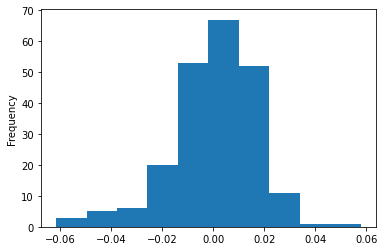

In [30]:
daily_returns["FB"].plot.hist()

<AxesSubplot:xlabel='time'>

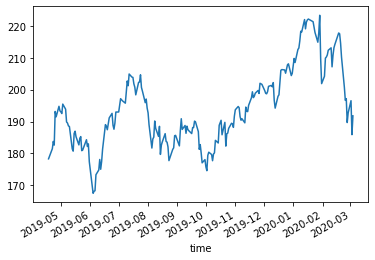

In [36]:
closing_df["FB"].plot()

In [37]:
closing_df.describe()

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,194.006800,1856.547486,239.736387,327.454033,1256.177491,351.180910,85.191295,118.695696,52.621407,195.732680,36.017854,134.702864,161.349225,273.316750,88.446904,284.153613,55.336390,44.566682,120.397558,81.443987
std,12.152698,101.301447,44.577845,36.247398,120.193468,72.484379,6.237527,9.283271,5.742084,39.463136,8.306690,4.882756,5.779778,26.508595,7.915799,21.728539,8.667457,3.749056,11.900622,12.743202
min,167.520000,1705.250000,175.000000,254.580000,1042.653800,219.090000,72.930000,90.740000,42.180000,135.460000,26.240000,124.370000,146.010000,222.480000,72.310000,239.570000,40.520000,35.800000,91.980000,62.000000
25%,185.335000,1777.350775,203.407500,294.292500,1164.585000,307.547500,80.782500,112.805000,47.187500,165.325000,29.720000,131.700000,156.767500,253.707500,81.562500,269.267500,49.350000,41.345000,108.967500,70.265000
50%,191.735000,1837.950000,220.970000,327.850000,1235.450000,328.450000,85.180000,121.635000,53.715000,183.005000,32.410000,134.725000,161.005000,277.805000,88.695000,291.835000,55.327500,46.415000,122.875000,78.828250
75%,201.412500,1907.110000,271.855000,360.507500,1341.027500,392.127500,89.485000,125.110000,58.170000,224.020000,41.535000,137.075000,166.410000,285.392500,94.360000,299.557500,62.812500,47.765000,129.947500,91.790000
max,223.310000,2170.210000,327.200000,387.770000,1527.000000,543.180000,99.260000,134.210000,64.370000,314.710000,58.910000,147.000000,172.740000,373.150000,106.210000,324.080000,70.900000,52.780000,140.510000,117.470000


In [39]:
correlation = closing_df.corr()
correlation

,FB,AMZN,AAPL,NFLX,GOOG,SHOP,PLD,TTWO,ATVI,NVDA,AMD,PEP,MKC,DPZ,WING,COST,ETSY,CPB,OKTA,ZM
FB,1.000000,0.524817,0.791420,0.328413,0.771462,0.655942,0.662649,0.217871,0.643528,0.748390,0.828713,0.536542,0.491782,0.424411,0.155257,0.558057,-0.392532,0.480602,0.429346,-0.083995
AMZN,0.524817,1.000000,0.273163,0.765331,0.306068,0.418552,0.143746,-0.338656,0.154077,0.377706,0.443601,0.263603,-0.213796,0.384637,0.331589,0.061217,0.314639,-0.100513,0.455016,0.500299
AAPL,0.791420,0.273163,1.000000,0.072919,0.959996,0.804580,0.895663,0.317352,0.920812,0.957046,0.942319,0.787652,0.576372,0.512257,0.043134,0.806826,-0.675936,0.830901,0.251817,-0.210101
NFLX,0.328413,0.765331,0.072919,1.000000,0.078774,0.154192,-0.164333,-0.633159,-0.125205,0.177144,0.270040,-0.043709,-0.384414,0.561969,0.031058,-0.328313,0.400207,-0.371733,0.311930,0.386992
GOOG,0.771462,0.306068,0.959996,0.078774,1.000000,0.768080,0.843692,0.260855,0.896883,0.945661,0.896156,0.736669,0.532167,0.452800,0.022842,0.757654,-0.628154,0.758950,0.172885,-0.226849
SHOP,0.655942,0.418552,0.804580,0.154192,0.768080,1.000000,0.791498,0.456015,0.779877,0.788216,0.873044,0.806898,0.490779,0.364312,0.527810,0.749135,-0.447482,0.675986,0.585695,0.282990
PLD,0.662649,0.143746,0.895663,-0.164333,0.843692,0.791498,1.000000,0.536071,0.895509,0.836558,0.828280,0.880738,0.671884,0.341874,0.199531,0.939379,-0.673094,0.907021,0.320368,-0.127522
TTWO,0.217871,-0.338656,0.317352,-0.633159,0.260855,0.456015,0.536071,1.000000,0.441691,0.164044,0.259493,0.437510,0.656687,-0.375623,0.479609,0.646987,-0.517079,0.605150,0.301297,-0.033823
ATVI,0.643528,0.154077,0.920812,-0.125205,0.896883,0.779877,0.895509,0.441691,1.000000,0.906809,0.823351,0.840303,0.558273,0.379870,0.098576,0.870022,-0.657707,0.902694,0.107660,-0.208924
NVDA,0.748390,0.377706,0.957046,0.177144,0.945661,0.788216,0.836558,0.164044,0.906809,1.000000,0.922546,0.744579,0.430265,0.615057,0.013817,0.755973,-0.573301,0.755058,0.212942,-0.118719


<AxesSubplot:>

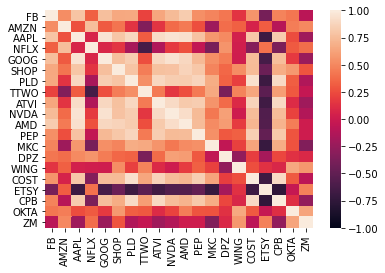

In [41]:
sns.heatmap(correlation, vmin=-1, vmax=1)